In [44]:
# noqa
import wandb
import matplotlib.pyplot as plt
import numpy as np

from plot_utils import plot_setting

In [45]:
plot_setting(font_size=18)

In [46]:
# wandb.init(project="iclr2024-qkvflow")/

In [47]:
def retrieve_test_loss(run_id):
    run = wandb.Api().run(run_id)
    metric_history = run.history(keys=["eval/loss"])
    values = metric_history["eval/loss"].to_numpy()
    steps = metric_history["_step"].to_numpy()
    return steps, values

## Pretrain on WIKI, finetune on OWT

### Full weight

In [48]:
# pretrain
pretrain_owt = "anhth/iclr2024-qkvflow/pretrain_gpt_owt"

# finetune
finetune_gpt_owt = "anhth/iclr2024-qkvflow/finetune_gpt_on_owt_full"
finetune_our_24_owt = "anhth/iclr2024-qkvflow/finetune_our_owt_full_24_2"
finetune_our_18_owt = "anhth/iclr2024-qkvflow/finetune_our_owt_full_18"
finetune_our_12_owt = "anhth/iclr2024-qkvflow/finetune_our_owt_full_12"
finetune_our_9_owt = "anhth/iclr2024-qkvflow/finetune_our_owt_full_9_2"

In [49]:
run_ids = [
    pretrain_owt,
    finetune_gpt_owt,
    finetune_our_24_owt,
    finetune_our_18_owt,
    finetune_our_12_owt,
    finetune_our_9_owt,
]

In [50]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

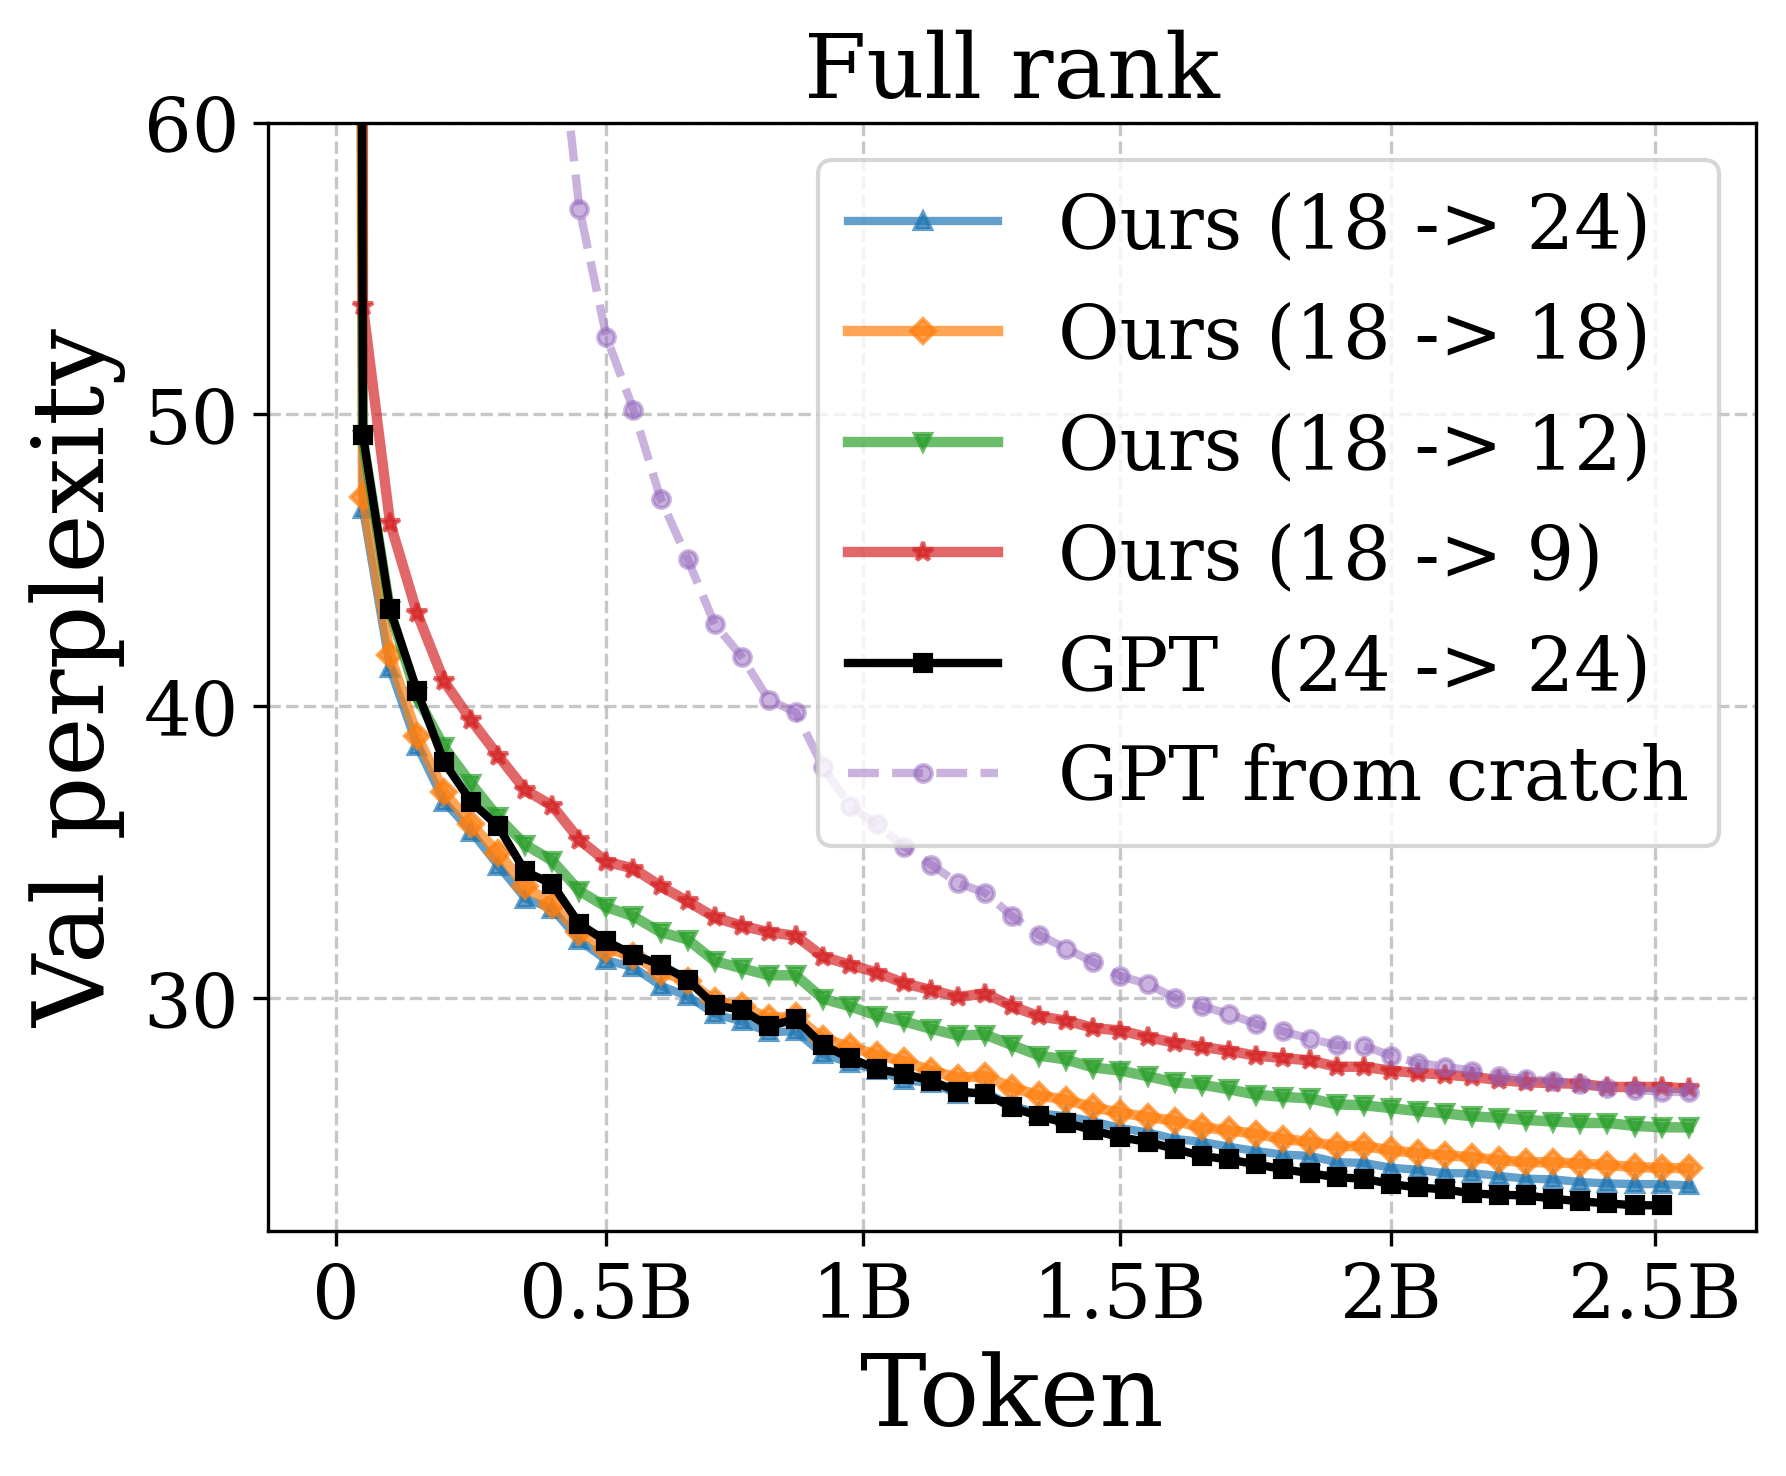

In [51]:
plt.plot(
    steps,
    np.exp(test_losses[2]),
    linestyle="-",
    marker="^",
    markersize=4,
    linewidth=2,
    alpha=0.7,
    label="Ours (18 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[3]),
    linestyle="-",
    marker="D",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 18)",
)
plt.plot(
    steps,
    np.exp(test_losses[4]),
    linestyle="-",
    marker="v",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 12)",
)
plt.plot(
    steps,
    np.exp(test_losses[5]),
    linestyle="-",
    marker="*",
    markersize=5,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 9)",
)

plt.plot(
    steps[:-1],
    np.exp(test_losses[1]),
    linestyle="-",
    marker="s",
    color="k",
    markersize=4,
    linewidth=2,
    label="GPT  (24 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[0]),
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=2,
    alpha=0.5,
    label="GPT from cratch",
)
plt.ylabel("Val perplexity", fontsize=24)
plt.xlabel("Token", fontsize=24)
plt.xticks([0, 2000, 3900, 5800, 7800, 9750], ["0", "0.5B", "1B", "1.5B", "2B", "2.5B"])

plt.legend()
plt.ylim(22, 60)
plt.title("Full rank")

plt.savefig(
    "../output/figures/finetune/full_owt.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/finetune/full_owt.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

### LoRA

In [52]:
# pretrain
pretrain = "anhth/iclr2024-qkvflow/pretrain_gpt_owt"

# finetune
finetune_gpt = "anhth/iclr2024-qkvflow/finetune_gpt_on_owt_lora"
finetune_our_24 = "anhth/iclr2024-qkvflow/finetune_our_owt_lora_24_2"
finetune_our_18 = "anhth/iclr2024-qkvflow/finetune_our_owt_lora_18"
finetune_our_12 = "anhth/iclr2024-qkvflow/finetune_our_owt_lora_12"
finetune_our_9 = "anhth/iclr2024-qkvflow/finetune_our_owt_lora_9_2"

In [53]:
run_ids = [
    pretrain,
    finetune_gpt,
    finetune_our_24,
    finetune_our_18,
    finetune_our_12,
    finetune_our_9,
]

In [54]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

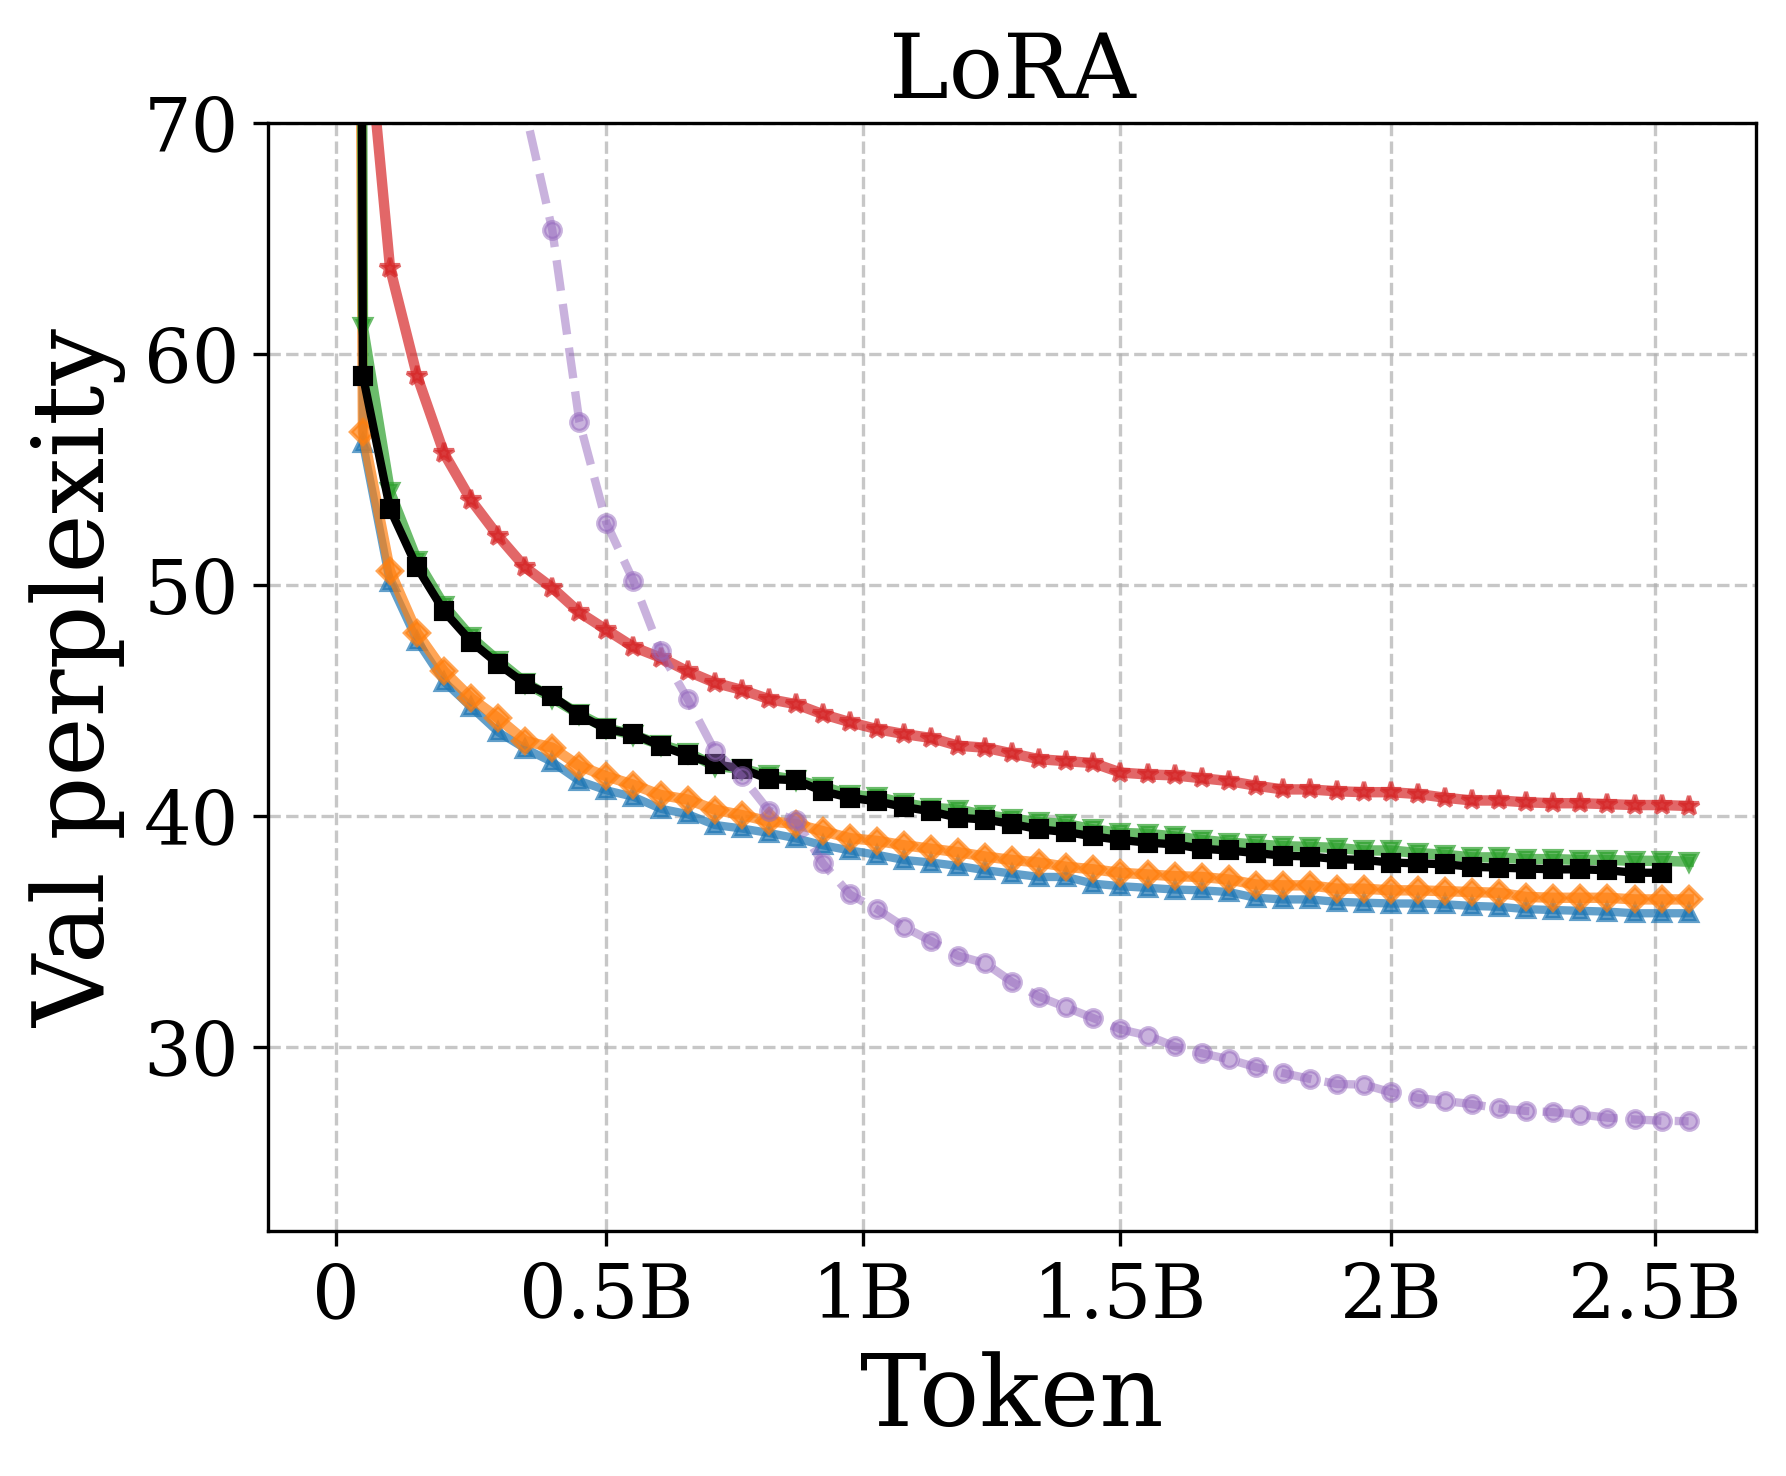

In [55]:
plt.plot(
    steps,
    np.exp(test_losses[2]),
    linestyle="-",
    marker="^",
    markersize=4,
    linewidth=2,
    alpha=0.7,
    label="Ours (18 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[3]),
    linestyle="-",
    marker="D",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 18)",
)
plt.plot(
    steps,
    np.exp(test_losses[4]),
    linestyle="-",
    marker="v",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 12)",
)
plt.plot(
    steps,
    np.exp(test_losses[5]),
    linestyle="-",
    marker="*",
    markersize=5,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 9)",
)

plt.plot(
    steps[:-1],
    np.exp(test_losses[1]),
    linestyle="-",
    marker="s",
    color="k",
    markersize=4,
    linewidth=2,
    label="GPT  (24 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[0]),
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=2,
    alpha=0.5,
    label="GPT from cratch",
)
plt.ylabel("Val perplexity", fontsize=24)
plt.xlabel("Token", fontsize=24)
plt.xticks([0, 2000, 3900, 5800, 7800, 9750], ["0", "0.5B", "1B", "1.5B", "2B", "2.5B"])


plt.ylim(22, 70)
plt.title("LoRA")
# plt.legend()/


plt.savefig(
    "../output/figures/finetune/lora_owt.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/finetune/lora_owt.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

## Pretrain on OWT, finetune on Wiki

### Full

In [56]:
# pretrain
pretrain = "anhth/iclr2024-qkvflow/pretrain_gpt_wiki"

# finetune
finetune_gpt = "anhth/iclr2024-qkvflow/finetune_gpt_on_wiki_full"
finetune_our_24 = "anhth/iclr2024-qkvflow/finetune_our_wiki_full_24_2"
finetune_our_18 = "anhth/iclr2024-qkvflow/finetune_our_wiki_full_18"
finetune_our_12 = "anhth/iclr2024-qkvflow/finetune_our_wiki_full_12"
finetune_our_9 = "anhth/iclr2024-qkvflow/finetune_our_wiki_full_9_2"

In [57]:
run_ids = [
    pretrain,
    finetune_gpt,
    finetune_our_24,
    finetune_our_18,
    finetune_our_12,
    finetune_our_9,
]

In [58]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

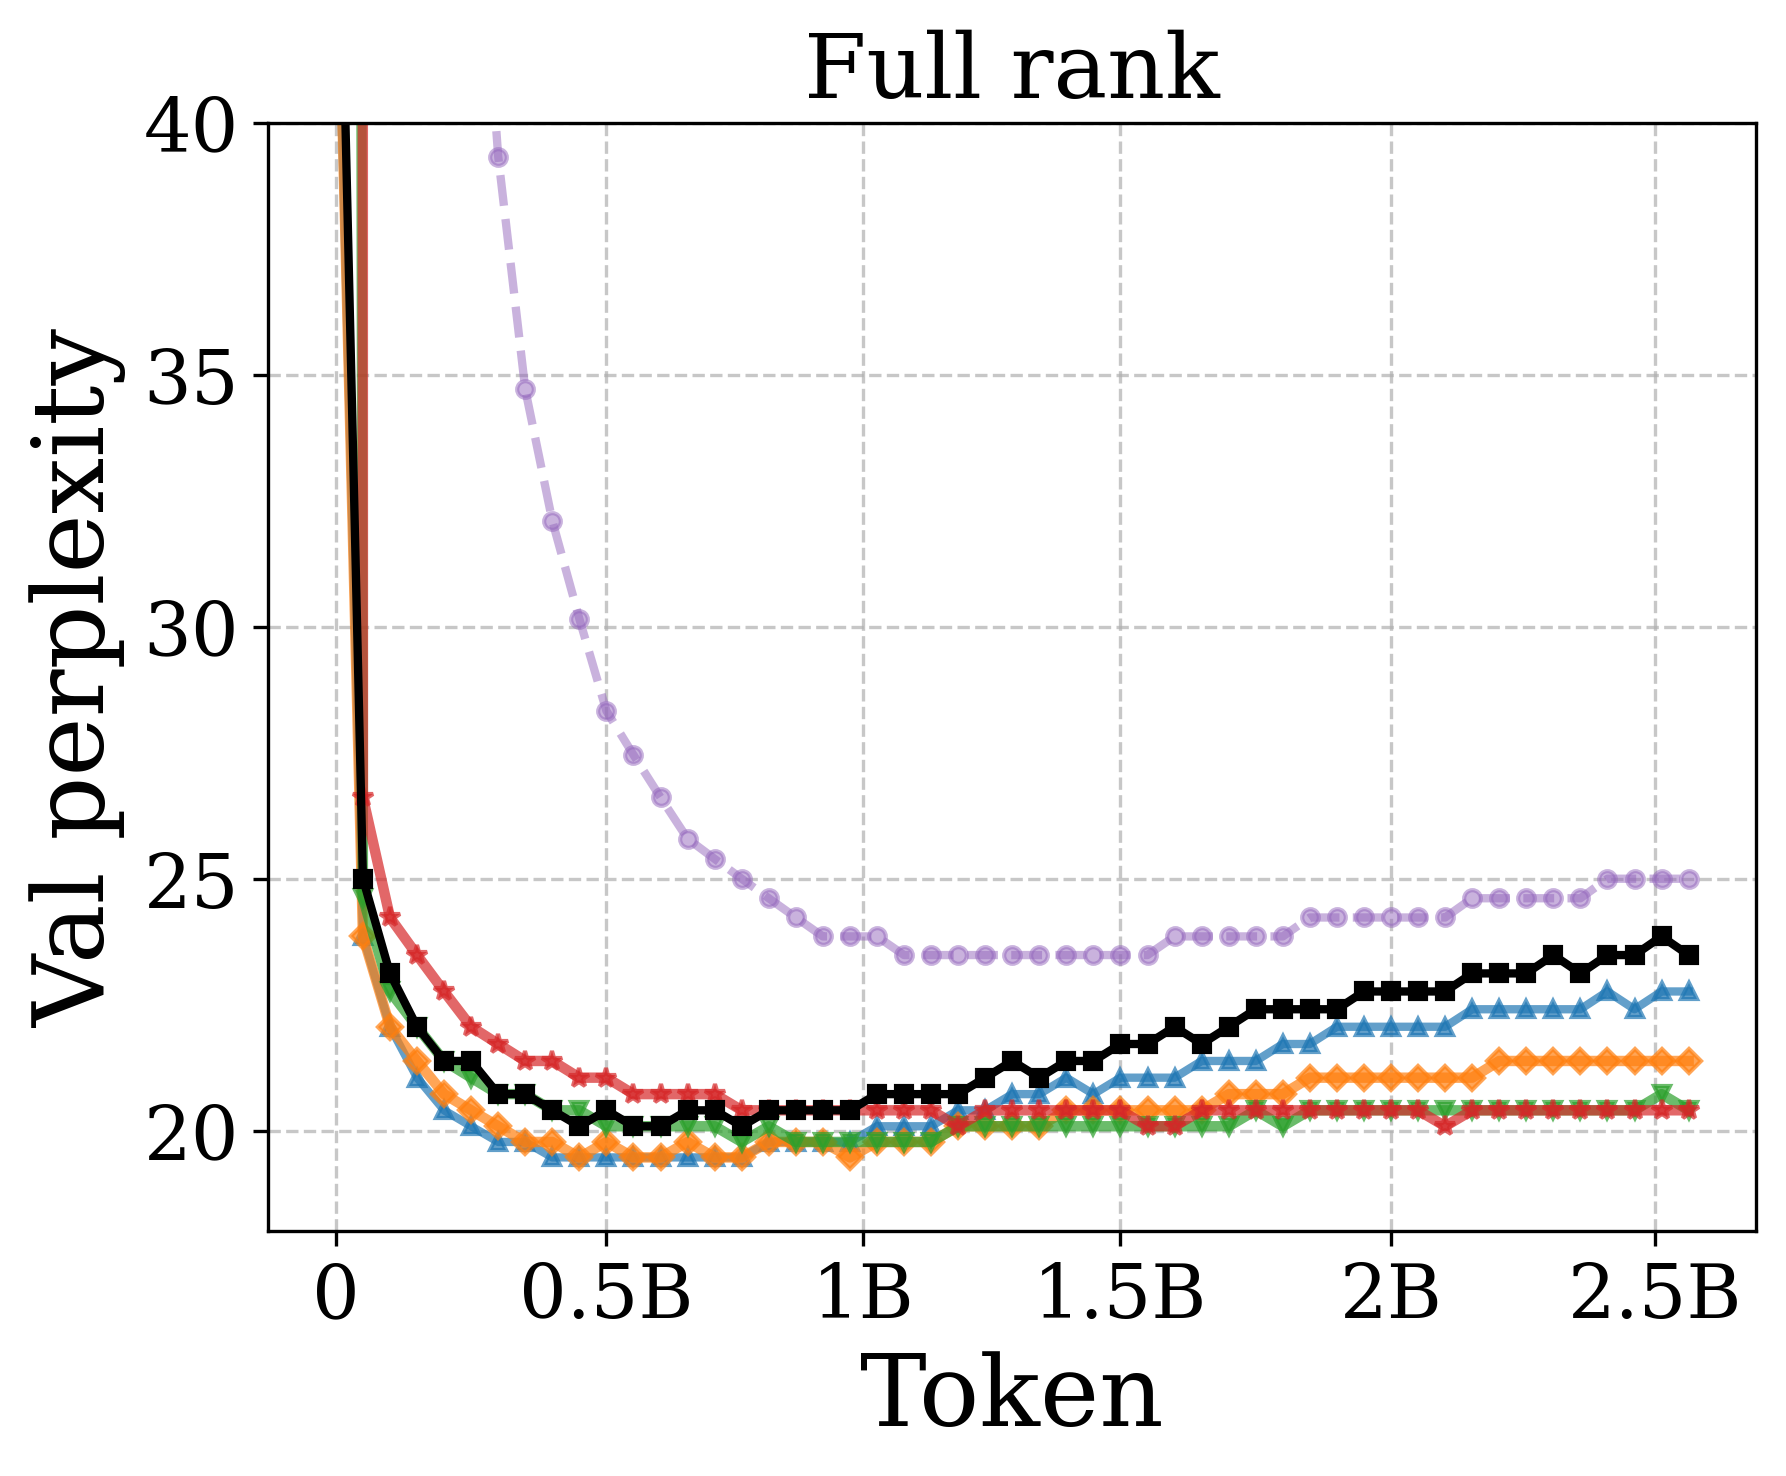

In [59]:
plt.plot(
    steps,
    np.exp(test_losses[2]),
    linestyle="-",
    marker="^",
    markersize=4,
    linewidth=2,
    alpha=0.7,
    label="Ours (18 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[3]),
    linestyle="-",
    marker="D",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 18)",
)
plt.plot(
    steps,
    np.exp(test_losses[4]),
    linestyle="-",
    marker="v",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 12)",
)
plt.plot(
    steps,
    np.exp(test_losses[5]),
    linestyle="-",
    marker="*",
    markersize=5,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 9)",
)

plt.plot(
    steps,
    np.exp(test_losses[1]),
    linestyle="-",
    marker="s",
    color="k",
    markersize=4,
    linewidth=2,
    label="GPT  (24 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[0]),
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=2,
    alpha=0.5,
    label="GPT from cratch",
)
plt.ylabel("Val perplexity", fontsize=24)
plt.xlabel("Token", fontsize=24)
plt.xticks([0, 2000, 3900, 5800, 7800, 9750], ["0", "0.5B", "1B", "1.5B", "2B", "2.5B"])

# plt.legend()

plt.ylim(18, 40)
plt.title("Full rank")


plt.savefig(
    "../output/figures/finetune/full_wiki.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/finetune/full_wiki.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)

### LoRA

In [60]:
# pretrain
pretrain = "anhth/iclr2024-qkvflow/pretrain_gpt_wiki"

# finetune
finetune_gpt = "anhth/iclr2024-qkvflow/finetune_gpt_on_wiki_lora"
finetune_our_24 = "anhth/iclr2024-qkvflow/finetune_our_wiki_lora_24_2"
finetune_our_18 = "anhth/iclr2024-qkvflow/finetune_our_wiki_lora_18"
finetune_our_12 = "anhth/iclr2024-qkvflow/finetune_our_wiki_lora_12"
finetune_our_9 = "anhth/iclr2024-qkvflow/finetune_our_wiki_lora_9_2"

In [61]:
run_ids = [
    pretrain,
    finetune_gpt,
    finetune_our_24,
    finetune_our_18,
    finetune_our_12,
    finetune_our_9,
]

In [62]:
steps = None
test_losses = []
for run_id in run_ids:
    steps, test_loss = retrieve_test_loss(run_id)
    test_losses.append(test_loss)

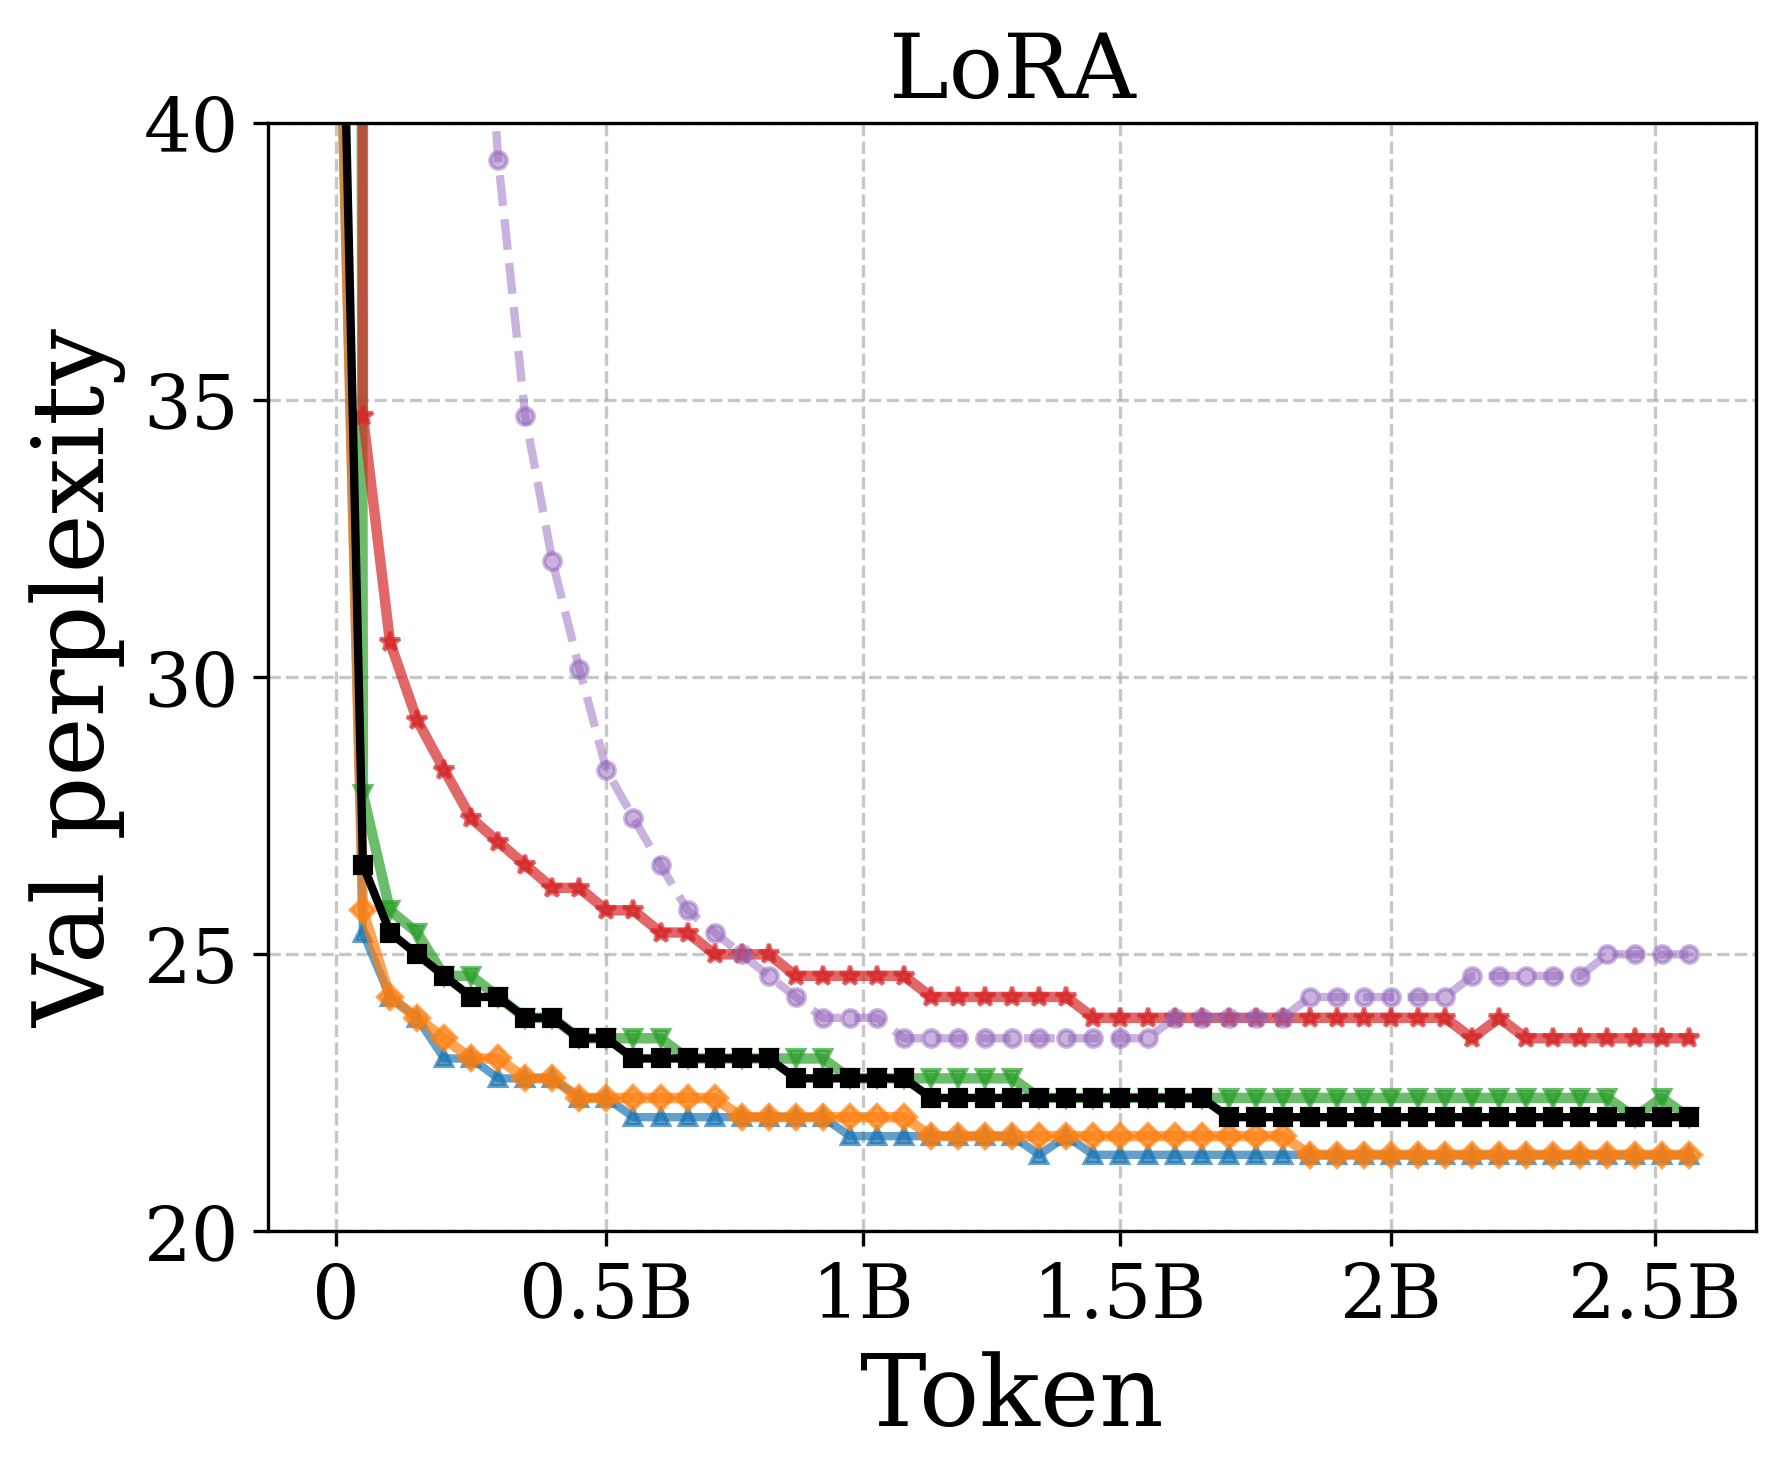

In [63]:
plt.plot(
    steps,
    np.exp(test_losses[2]),
    linestyle="-",
    marker="^",
    markersize=4,
    linewidth=2,
    alpha=0.7,
    label="Ours (18 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[3]),
    linestyle="-",
    marker="D",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 18)",
)
plt.plot(
    steps,
    np.exp(test_losses[4]),
    linestyle="-",
    marker="v",
    markersize=4,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 12)",
)
plt.plot(
    steps,
    np.exp(test_losses[5]),
    linestyle="-",
    marker="*",
    markersize=5,
    linewidth=2.5,
    alpha=0.7,
    label="Ours (18 -> 9)",
)

plt.plot(
    steps,
    np.exp(test_losses[1]),
    linestyle="-",
    marker="s",
    color="k",
    markersize=4,
    linewidth=2,
    label="GPT  (24 -> 24)",
)
plt.plot(
    steps,
    np.exp(test_losses[0]),
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=2,
    alpha=0.5,
    label="GPT from cratch",
)
plt.ylabel("Val perplexity", fontsize=24)
plt.xlabel("Token", fontsize=24)
plt.xticks([0, 2000, 3900, 5800, 7800, 9750], ["0", "0.5B", "1B", "1.5B", "2B", "2.5B"])

# plt.legend()

plt.ylim(20, 40)
plt.title("LoRA")


plt.savefig(
    "../output/figures/finetune/lora_wiki.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.savefig(
    "../output/figures/finetune/lora_wiki.jpg",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)